In [1]:
import pandas as pd
import numpy as np
import os, glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re

pd.set_option('max_rows',200)

**Which tickers did not get consolidated?**

In [2]:
currents, consolidated = set([os.path.basename(f) for f in glob.glob('currents/*.pkl')]), set(set([os.path.basename(f) for f in glob.glob('consolidated/*.pkl')]))

In [3]:
currents-consolidated

set()

**How many tickers have we conslidated?**

In [4]:
len(consolidated)

502

**Which elements are within "isStartEndPeriod"**

Combine all consolidated dataframes together

In [5]:
from multiprocessing import Pool

In [6]:
%%time

def get_df(f):
    try:
        df_t = pd.read_pickle(f)
        return df_t
    except Exception as e:
        print(e)
        return

p = Pool(3)
dfs = p.map(get_df, glob.glob('consolidated/*.pkl'))

CPU times: user 3.6 s, sys: 2.8 s, total: 6.4 s
Wall time: 12.5 s


In [7]:
df = pd.concat(dfs, ignore_index=True, sort=False)

In [8]:
# df.to_pickle('consolidated_all.pkl')

In [9]:
period_accounts = df[df.isStartEndPeriod & (df.Account.str.contains('us-gaap:'))].Account.value_counts()

In [10]:
len(period_accounts)

3898

In [11]:
period_accounts.head(100)

us-gaap:EarningsPerShareDiluted                                                                                        19284
us-gaap:IncomeTaxExpenseBenefit                                                                                        19237
us-gaap:EarningsPerShareBasic                                                                                          19204
us-gaap:WeightedAverageNumberOfDilutedSharesOutstanding                                                                18375
us-gaap:WeightedAverageNumberOfSharesOutstandingBasic                                                                  18333
us-gaap:NetIncomeLoss                                                                                                  17730
us-gaap:CashAndCashEquivalentsPeriodIncreaseDecrease                                                                   17689
us-gaap:NetCashProvidedByUsedInInvestingActivities                                                                     16033


# Analysis

**INCOME STATEMENT**

In [15]:
import extractions
import imp; imp.reload(extractions)

<module 'extractions' from '/home/ray/Projects/trading/edgar/extractions.py'>

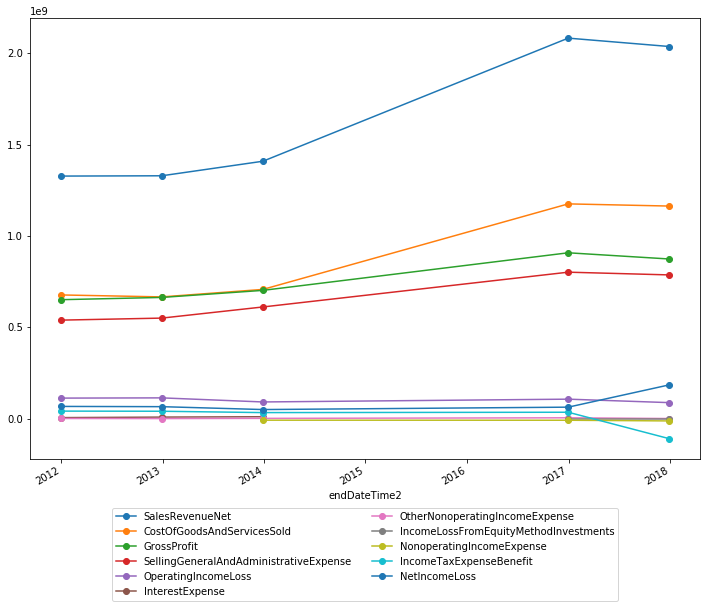

In [22]:
income = extractions.get_income_statements('AAP')

fig,ax = plt.subplots(figsize=(12,9))
income.plot(ax=ax, marker='o')
ax.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)

In [21]:
income

,TotalRevenuesAndOtherIncome,Revenues,SellingGeneralAndAdministrativeExpense,CostsAndExpenses,InterestExpense,IncomeLossFromEquityMethodInvestments,IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,IncomeTaxExpenseBenefit,ProfitLoss,NetIncomeLoss
endDateTime2,,,,,,,,,,
2008-06-30,1.380720e+11,NaN,4.389000e+09,1.156410e+11,107000000.0,2.983000e+09,NaN,1.052600e+10,NaN,1.168000e+10
2008-09-30,1.377370e+11,NaN,3.823000e+09,1.110440e+11,318000000.0,2.824000e+09,NaN,1.132700e+10,1.536600e+10,1.483000e+10
2008-12-31,8.469600e+10,NaN,3.859000e+09,7.089700e+10,118000000.0,2.465000e+09,NaN,5.375000e+09,8.424000e+09,7.820000e+09
2009-03-31,6.402800e+10,NaN,3.448000e+09,5.617800e+10,107000000.0,1.470000e+09,NaN,3.148000e+09,4.702000e+09,4.550000e+09
2009-06-30,7.445700e+10,NaN,3.519000e+09,6.694000e+10,343000000.0,1.583000e+09,NaN,3.571000e+09,3.946000e+09,3.950000e+09
2009-09-30,8.226000e+10,NaN,3.887000e+09,7.305600e+10,62000000.0,1.675000e+09,NaN,4.333000e+09,4.871000e+09,4.730000e+09
2009-12-31,8.984100e+10,NaN,3.881000e+09,7.963500e+10,36000000.0,2.415000e+09,NaN,4.067000e+09,6.139000e+09,6.050000e+09
2010-03-31,9.025100e+10,NaN,3.514000e+09,7.818300e+10,55000000.0,2.537000e+09,NaN,5.493000e+09,6.575000e+09,6.300000e+09
2010-06-30,9.248600e+10,NaN,3.607000e+09,7.978000e+10,40000000.0,2.244000e+09,1.270600e+10,4.960000e+09,7.746000e+09,7.560000e+09


In [9]:
extractions.get_startend_valuecounts('FB')

us-gaap:IncomeTaxExpenseBenefit                                                                                                                      31
us-gaap:ShareBasedCompensation                                                                                                                       31
us-gaap:ResearchAndDevelopmentExpense                                                                                                                31
us-gaap:GeneralAndAdministrativeExpense                                                                                                              31
us-gaap:OperatingLeasesRentExpenseNet                                                                                                                31
us-gaap:AmortizationOfIntangibleAssets                                                                                                               31
us-gaap:OperatingIncomeLoss                                                             

**CASHFLOW STATEMENT**

In [18]:
ticker = 'F'
df = pd.read_pickle('consolidated/{}.pkl'.format(ticker))
valuecounts = df.query("isStartEndPeriod").Account.value_counts()

In [19]:
valuecounts

us-gaap:Revenues                                                                                                                                           43
us-gaap:IncomeLossFromEquityMethodInvestments                                                                                                              43
us-gaap:SellingGeneralAndAdministrativeExpense                                                                                                             43
us-gaap:IncomeTaxExpenseBenefit                                                                                                                            43
us-gaap:ProfitLoss                                                                                                                                         43
us-gaap:ComprehensiveIncomeNetOfTaxIncludingPortionAttributableToNoncontrollingInterest                                                                    43
us-gaap:CostsAndExpenses                            